## **LIBRERIAS**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

## **CARGANDO EL CONJUNTO DE DATOS**

In [2]:
df_train = pd.read_excel("../Data/Melsol-test.xlsx")
df_train.head(5)

,MES,PRODUCTOS ALMACENADOS,GASTO DE MARKETING,GASTO DE ALMACENAMIENTO,DEMANDA DEL PRODUCTO,FESTIVIDAD,PRECIO DE VENTA,PRODUCTOS VENDIDOS
0,1,6,0.4,1.71,1,0,10.6,1
1,2,3,0.4,1.71,1,1,10.6,0
2,3,3,0.4,0.57,1,0,10.6,2
3,4,1,0.4,0.57,1,1,10.6,0
4,5,13,0.4,6.27,1,1,10.6,2


In [12]:
new_df = pd.read_excel("../Data/Farmacia-entrenamiento.xlsx")
new_df.head(5)

,MESES,PRODUCTOS ALMACENADOS,GASTO DE MARKETING,GASTO DE ALMACENAMIENTO,DEMANDA DEL PRODUCTO,FESTIVIDAD,PRECIO DE VENTA,PRODUCTOS VENDIDOS
0,1,10,0.4,1.71,1,0,10.6,1
1,2,3,0.4,1.71,1,1,10.6,0
2,3,3,0.4,0.57,1,0,10.6,2
3,4,1,0.4,0.57,1,1,10.6,0
4,5,13,0.4,6.27,1,1,10.6,2


In [14]:
new_df.columns = df_train.columns

In [15]:
new_df.head(5)

,MES,PRODUCTOS ALMACENADOS,GASTO DE MARKETING,GASTO DE ALMACENAMIENTO,DEMANDA DEL PRODUCTO,FESTIVIDAD,PRECIO DE VENTA,PRODUCTOS VENDIDOS
0,1,10,0.4,1.71,1,0,10.6,1
1,2,3,0.4,1.71,1,1,10.6,0
2,3,3,0.4,0.57,1,0,10.6,2
3,4,1,0.4,0.57,1,1,10.6,0
4,5,13,0.4,6.27,1,1,10.6,2


In [16]:
all(df_train.columns == new_df.columns)

True

In [17]:
len(df_train.columns)

8

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MES                      22 non-null     int64  
 1   PRODUCTOS ALMACENADOS    22 non-null     int64  
 2   GASTO DE MARKETING       22 non-null     float64
 3   GASTO DE ALMACENAMIENTO  22 non-null     float64
 4   DEMANDA DEL PRODUCTO     22 non-null     int64  
 5   FESTIVIDAD               22 non-null     int64  
 6   PRECIO DE VENTA          22 non-null     float64
 7   PRODUCTOS VENDIDOS       22 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 1.5 KB


## **EDA (Analisis Exploratorio de datos)**

In [11]:
df_train.describe()

,MES,PRODUCTOS ALMACENADOS,GASTO DE MARKETING,GASTO DE ALMACENAMIENTO,DEMANDA DEL PRODUCTO,FESTIVIDAD,PRECIO DE VENTA,PRODUCTOS VENDIDOS
count,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,2.200000e+01,22.000000
mean,6.045455,19.227273,4.000000e-01,7.053636,2.136364,0.409091,1.060000e+01,7.636364
std,3.316298,15.775001,1.136349e-16,5.741047,1.612317,0.503236,3.636318e-15,7.925519
min,1.000000,1.000000,4.000000e-01,0.570000,1.000000,0.000000,1.060000e+01,0.000000
25%,3.250000,8.000000,4.000000e-01,2.520000,1.000000,0.000000,1.060000e+01,2.000000
50%,6.000000,15.500000,4.000000e-01,5.655000,2.000000,0.000000,1.060000e+01,7.000000
75%,8.750000,28.750000,4.000000e-01,10.552500,2.750000,1.000000,1.060000e+01,10.750000
max,12.000000,68.000000,4.000000e-01,21.090000,7.000000,1.000000,1.060000e+01,31.000000


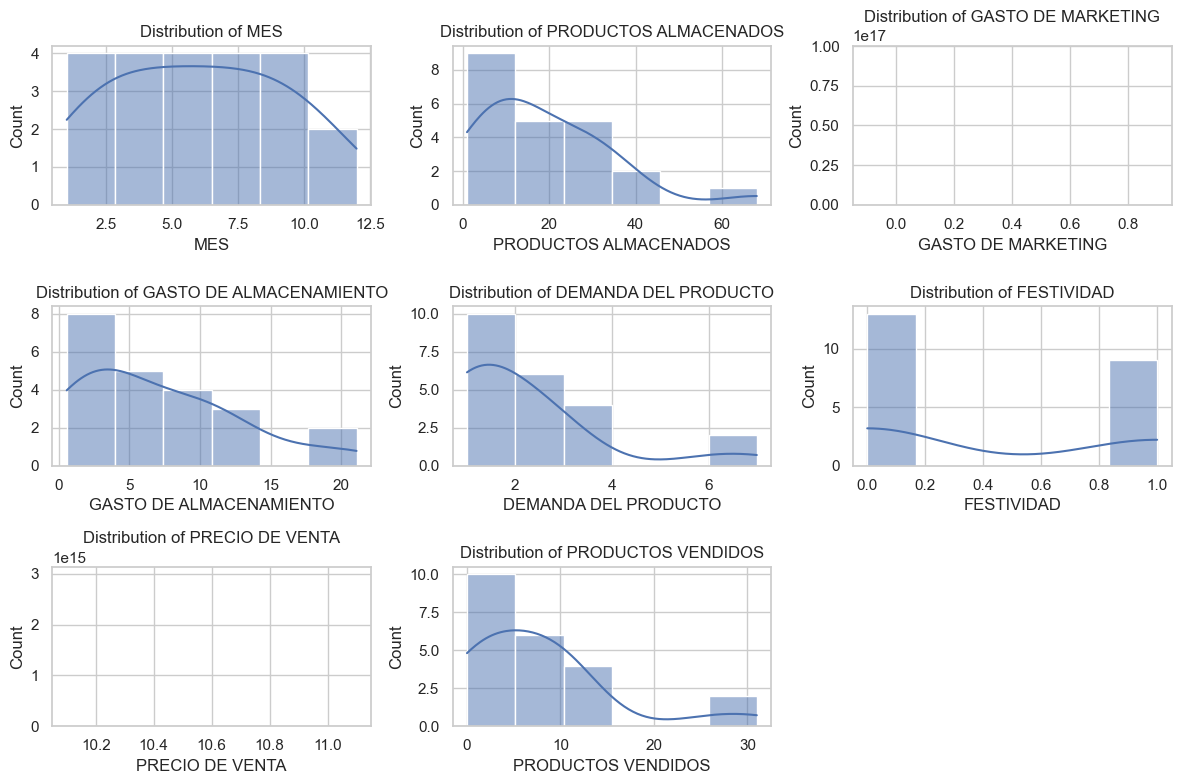

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de variables
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for i, column in enumerate(df_train.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_train[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


## **VERIFICAR DATOS ATIPICOS**

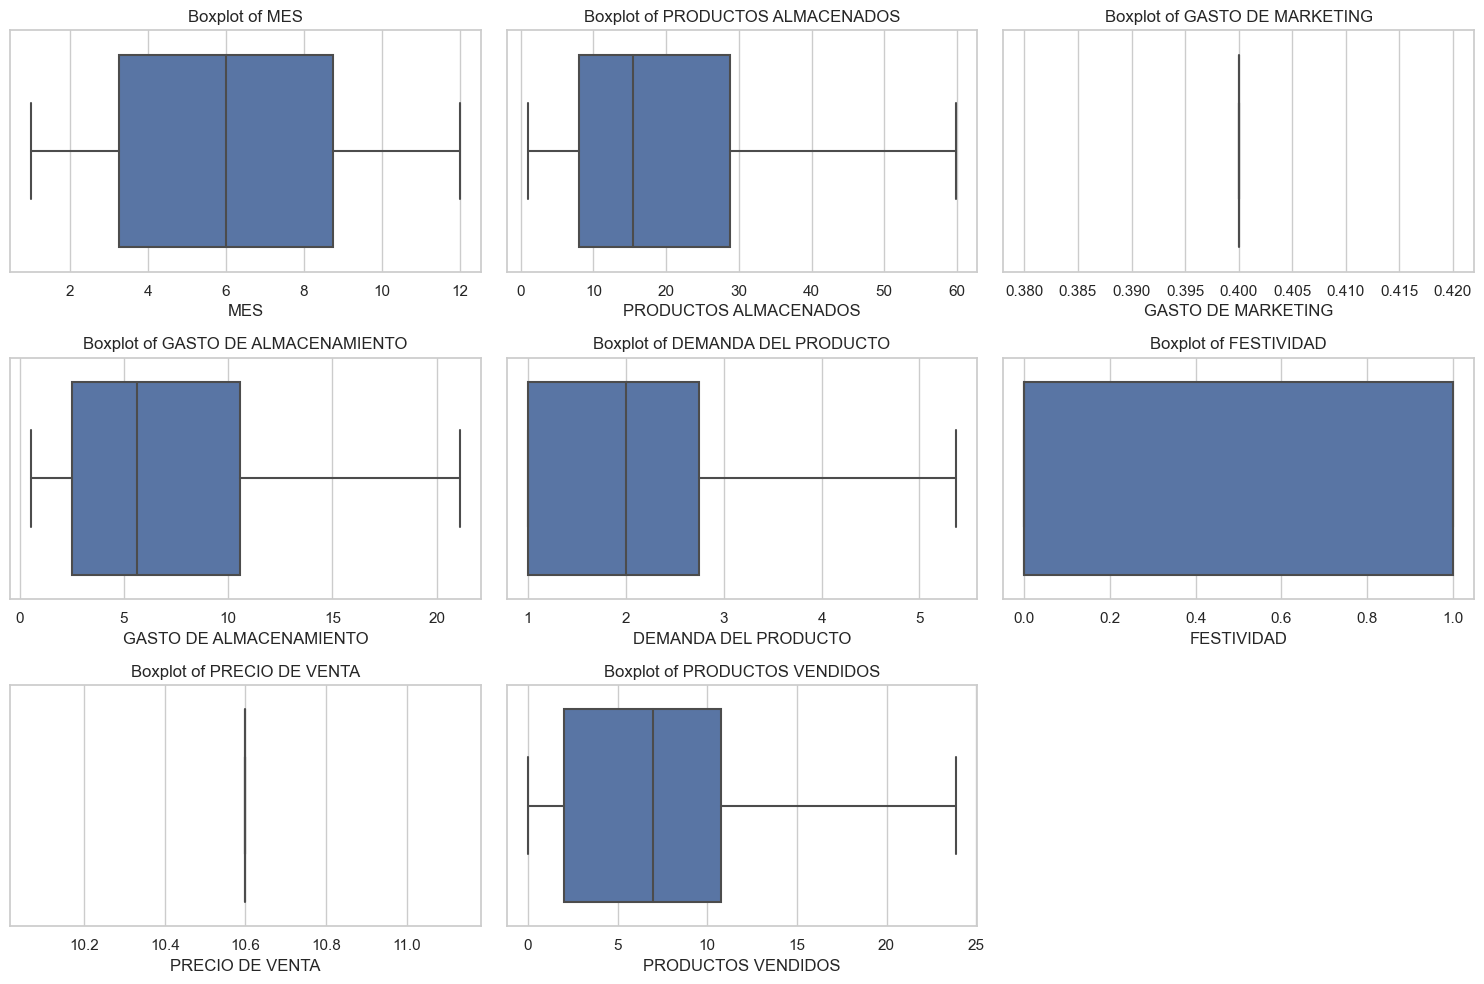

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Seleccionar las columnas numéricas
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Crear gráficos de caja para identificar valores atípicos
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_train[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


**Observaciones**
* Columna PRODUCTOS ALMACENADOS
* Columna DEMNADA DEL PRODUCTO
* Columna PRODUCTOS VENDIDOS


In [14]:
def handle_outliers(column, cap_value=None):
    # Calcula el rango intercuartílico (IQR)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define los límites superior e inferior para identificar los valores atípicos
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Acotar los valores atípicos
    if cap_value is not None:
        column = column.clip(lower=lower_limit, upper=cap_value)
    else:
        column = column.clip(lower=lower_limit, upper=upper_limit)
    
    return column

# Aplicar la función a las columnas con valores atípicos
df_train['PRODUCTOS ALMACENADOS'] = handle_outliers(df_train['PRODUCTOS ALMACENADOS'])
df_train['DEMANDA DEL PRODUCTO'] = handle_outliers(df_train['DEMANDA DEL PRODUCTO'])
df_train['PRODUCTOS VENDIDOS'] = handle_outliers(df_train['PRODUCTOS VENDIDOS'])

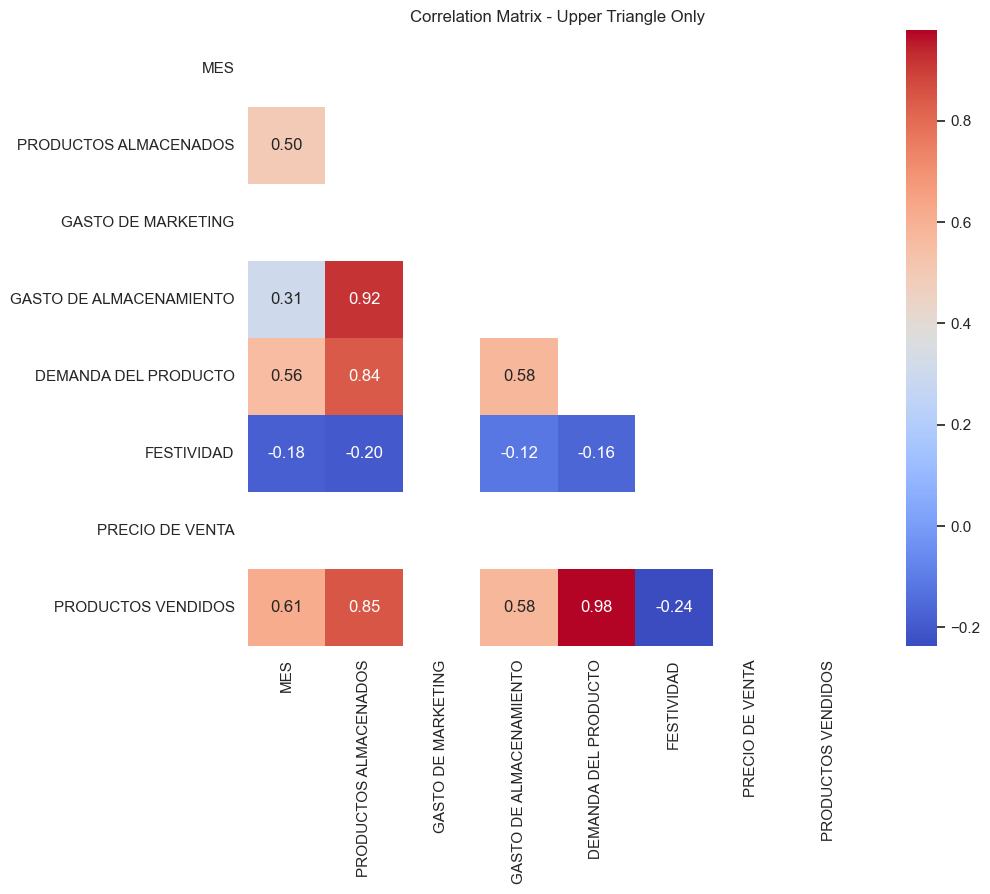

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_train.corr()

# Crear una máscara para la parte triangular inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de los gráficos
sns.set(style="white")

# Crear la figura y el eje (axis)
plt.figure(figsize=(10, 8))

# Crear el mapa de calor con la matriz de correlación
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# Configurar el título
plt.title('Correlation Matrix - Upper Triangle Only')

# Mostrar el gráfico
plt.show()


In [17]:
correlation_matrix

,MES,PRODUCTOS ALMACENADOS,GASTO DE MARKETING,GASTO DE ALMACENAMIENTO,DEMANDA DEL PRODUCTO,FESTIVIDAD,PRECIO DE VENTA,PRODUCTOS VENDIDOS
MES,1.000000,0.498156,NaN,0.305429,0.557235,-0.182874,NaN,0.613194
PRODUCTOS ALMACENADOS,0.498156,1.000000,NaN,0.920278,0.838341,-0.198671,NaN,0.848399
GASTO DE MARKETING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GASTO DE ALMACENAMIENTO,0.305429,0.920278,NaN,1.000000,0.576155,-0.116575,NaN,0.578698
DEMANDA DEL PRODUCTO,0.557235,0.838341,NaN,0.576155,1.000000,-0.164995,NaN,0.978426
FESTIVIDAD,-0.182874,-0.198671,NaN,-0.116575,-0.164995,1.000000,NaN,-0.237186
PRECIO DE VENTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRODUCTOS VENDIDOS,0.613194,0.848399,NaN,0.578698,0.978426,-0.237186,NaN,1.000000


**OBSERVACIONES** 
*CORRELACION FUERTE POSITIVA*
* PRODUCTOS ALMACENADOS y DEMANDA DEL PRODUCTO: 0.838341
* PRODUCTOS ALMACENADOS y PRODUCTOS VENDIDOS: 0.848399
* DEMANDA DEL PRODUCTO y PRODUCTOS VENDIDOS: 0.978426
* Correlación Fuerte Negativa:

*CORRELACION FUERTE NEGATIVA*

* FESTIVIDAD y PRODUCTOS VENDIDOS: -0.237186

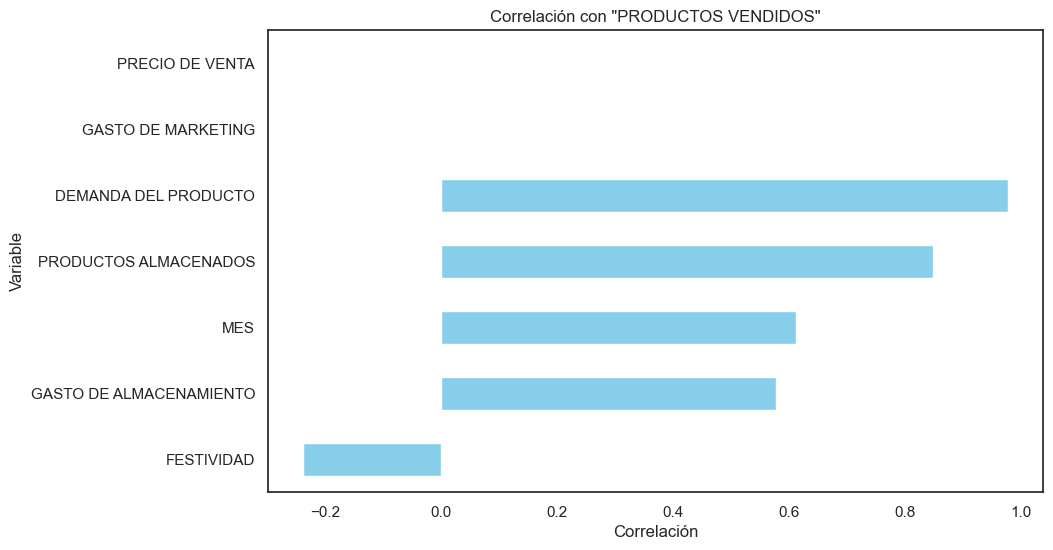

In [18]:
import matplotlib.pyplot as plt

# Seleccionar solo la columna de correlaciones con "PRODUCTOS VENDIDOS"
correlations_with_target = correlation_matrix['PRODUCTOS VENDIDOS'].drop('PRODUCTOS VENDIDOS')

# Crear un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
correlations_with_target.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlación con "PRODUCTOS VENDIDOS"')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.show()


## **PREPROCESAMIENTO**

In [19]:
# Mostrar el número de valores únicos de cada columna
for column in df_train.columns:
    num_unique_values = df_train[column].nunique()
    print(f'Columna: {column}, Número de Valores Únicos: {num_unique_values}')

Columna: MES, Número de Valores Únicos: 12
Columna: PRODUCTOS ALMACENADOS, Número de Valores Únicos: 17
Columna: GASTO DE MARKETING, Número de Valores Únicos: 1
Columna: GASTO DE ALMACENAMIENTO, Número de Valores Únicos: 17
Columna: DEMANDA DEL PRODUCTO, Número de Valores Únicos: 4
Columna: FESTIVIDAD, Número de Valores Únicos: 2
Columna: PRECIO DE VENTA, Número de Valores Únicos: 1
Columna: PRODUCTOS VENDIDOS, Número de Valores Únicos: 12


In [22]:
import pandas as pd

def analizar_y_eliminar_ruido(df):
    """
    Analiza el número de valores únicos en cada columna y decide si eliminar la columna si la cantidad de valores únicos es igual a 1.

    Parámetros:
    - df: DataFrame de pandas

    Retorna:
    - DataFrame modificado sin las columnas identificadas como ruido.
    """

    # Inicializar una lista para almacenar las columnas a eliminar
    columnas_a_eliminar = []

    # Iterar sobre cada columna del DataFrame
    for columna in df.columns:
        # Verificar si la cantidad de valores únicos es igual a 1
        if df[columna].nunique() == 1:
            columnas_a_eliminar.append(columna)
            print(f'Columna "{columna}" tiene un solo valor único. Se considera ruido.')

    # Eliminar las columnas identificadas como ruido
    df_sin_ruido = df.drop(columnas_a_eliminar, axis=1)

    print(f'\nColumnas eliminadas: {columnas_a_eliminar}')

    return df_sin_ruido

# Ejemplo de uso
df_sin_ruido = analizar_y_eliminar_ruido(df_train)


Columna "GASTO DE MARKETING" tiene un solo valor único. Se considera ruido.
Columna "PRECIO DE VENTA" tiene un solo valor único. Se considera ruido.

Columnas eliminadas: ['GASTO DE MARKETING', 'PRECIO DE VENTA']


In [23]:
df_sin_ruido.describe()

,MES,PRODUCTOS ALMACENADOS,GASTO DE ALMACENAMIENTO,DEMANDA DEL PRODUCTO,FESTIVIDAD,PRODUCTOS VENDIDOS
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,6.045455,18.857955,7.053636,2.034091,0.409091,7.215909
std,3.316298,14.632517,5.741047,1.322978,0.503236,6.759493
min,1.000000,1.000000,0.570000,1.000000,0.000000,0.000000
25%,3.250000,8.000000,2.520000,1.000000,0.000000,2.000000
50%,6.000000,15.500000,5.655000,2.000000,0.000000,7.000000
75%,8.750000,28.750000,10.552500,2.750000,1.000000,10.750000
max,12.000000,59.875000,21.090000,5.375000,1.000000,23.875000


In [25]:
df_sin_ruido.shape    

(22, 6)

In [32]:
# Definir las características (X) y la variable objetivo (y)
X = df_sin_ruido.drop('PRODUCTOS VENDIDOS', axis=1)
y = df_sin_ruido['PRODUCTOS VENDIDOS']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Imprimir las formas de los conjuntos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (19, 5)
Forma de X_test: (3, 5)
Forma de y_train: (19,)
Forma de y_test: (3,)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Crear el modelo de Random Forest Regression
bosque = RandomForestRegressor(n_estimators=100,
                                criterion="squared_error",
                                max_features="sqrt",
                                bootstrap=True,
                                oob_score=True,
                                random_state=42)

# Entrenar el modelo
bosque.fit(X_train.values, y_train.values)

# Predecir en un nuevo conjunto de datos
nuevos_datos = [[1, 10, 0.4, 5.0, 1]]  # Ajusta estos valores según tus datos
prediccion = bosque.predict(nuevos_datos)
print("Predicción:", prediccion)

# Evaluar el modelo en el conjunto de prueba
predicciones_test = bosque.predict(X_test.values)
mse = mean_squared_error(y_test.values, predicciones_test)
print("Error cuadrático medio en el conjunto de prueba:", mse)

# Imprimir la puntuación R^2 en el conjunto de entrenamiento
print("Puntuación R^2 en el conjunto de entrenamiento:", bosque.score(X_train.values, y_train.values))

# Imprimir la puntuación R^2 en el conjunto de prueba
print("Puntuación R^2 en el conjunto de prueba:", bosque.score(X_test.values, y_test.values))

# Imprimir la puntuación "out-of-bag" (OOB)
print("Puntuación OOB:", bosque.oob_score_)

Predicción: [8.7975]
Error cuadrático medio en el conjunto de prueba: 18.568420833333334
Puntuación R^2 en el conjunto de entrenamiento: 0.9682618602777255
Puntuación R^2 en el conjunto de prueba: -0.9432068313953492
Puntuación OOB: 0.7582531046849096


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# Crear el modelo de Random Forest Regression
bosque = RandomForestRegressor(n_estimators=100,
                                criterion="squared_error",  # Utilizar "squared_error" en lugar de "mse"
                                max_features="sqrt",
                                bootstrap=True,
                                oob_score=True,
                                random_state=42)

# Definir la métrica a utilizar (en este caso, negativo del Error Cuadrático Medio para que sea coherente con la validación cruzada)
metrica = make_scorer(mean_squared_error, greater_is_better=False)

# Realizar validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Puedes ajustar el número de divisiones (folds)
resultados_cross_val = cross_val_score(bosque, X.values, y.values, cv=kf, scoring=metrica)

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print("MSE por fold:", -resultados_cross_val)
print("Promedio MSE:", -resultados_cross_val.mean())

# Entrenar el modelo en todo el conjunto de datos
bosque.fit(X.values, y.values)

# Predecir en un nuevo conjunto de datos
nuevos_datos = [[1, 10, 0.4, 5.0, 1]]  # Ajusta estos valores según tus datos
prediccion = bosque.predict(nuevos_datos)
print("Predicción:", prediccion)

# Imprimir la puntuación R^2 en el conjunto completo
print("Puntuación R^2 en el conjunto completo:", bosque.score(X.values, y.values))

# Imprimir la puntuación "out-of-bag" (OOB)
print("Puntuación OOB:", bosque.oob_score_)


Resultados de la validación cruzada:
MSE por fold: [13.79683125  4.46321188 12.78234648 21.83708203 31.74966406]
Promedio MSE: 16.925827140625
Predicción: [9.9125]
Puntuación R^2 en el conjunto completo: 0.9557545513492388
Puntuación OOB: 0.6387512699228487


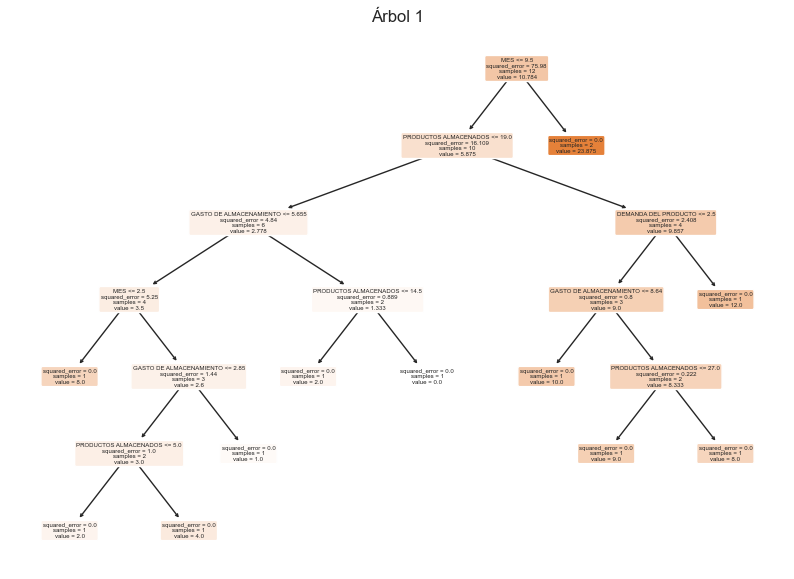

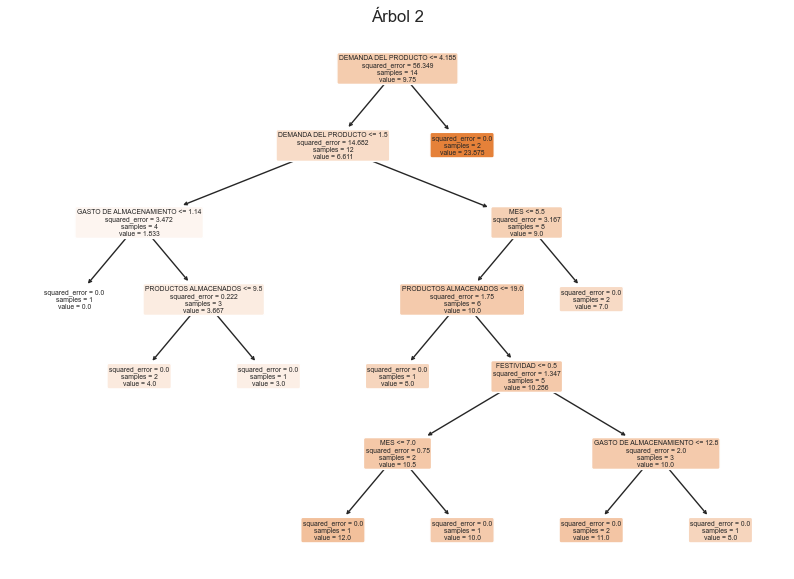

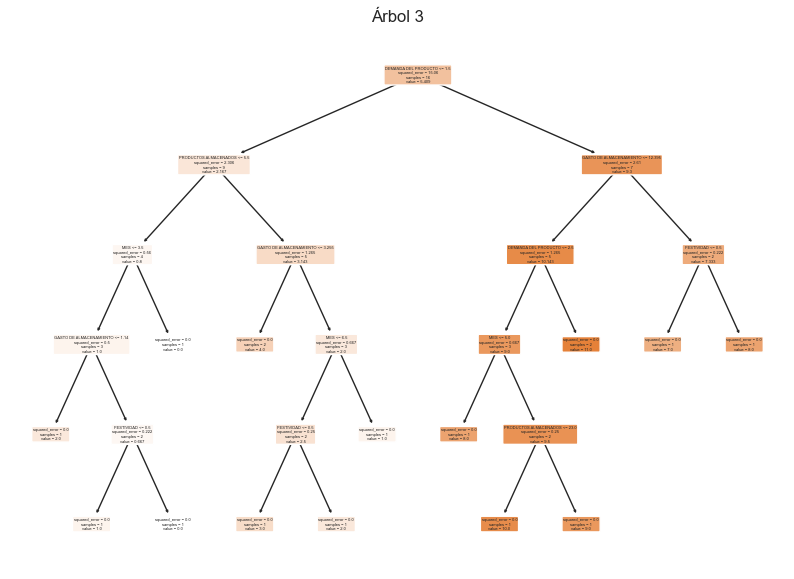

In [40]:
import matplotlib.pyplot as plt
from sklearn import tree

# Suponiendo que bosque es tu modelo entrenado
for i, arbol in enumerate(bosque.estimators_[:3]):  # Limitar a los primeros tres árboles
    plt.figure(figsize=(10, 7))
    tree.plot_tree(arbol, feature_names=X.columns.tolist(), filled=True, rounded=True)
    plt.title(f"Árbol {i+1}")
    plt.show()


Mean Absolute Error: 2.1248148148148145
Mean Squared Error: 8.923998765432101
Root Mean Squared Error: 2.987306272452174
R²: 0.42172487999999986


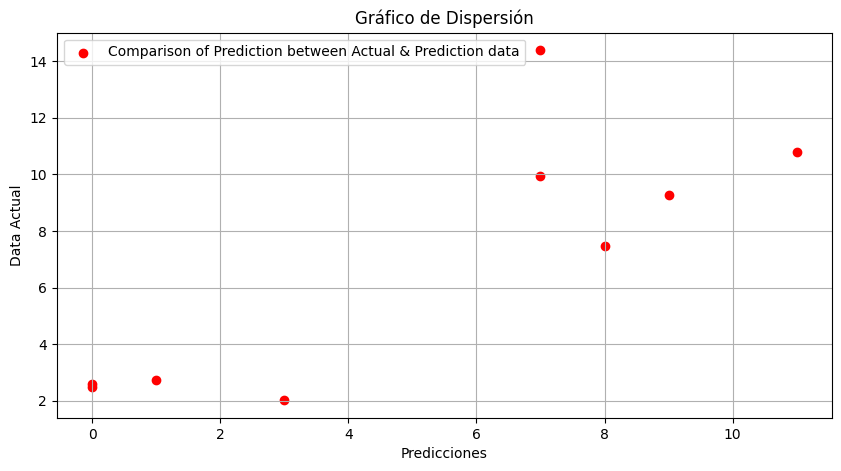

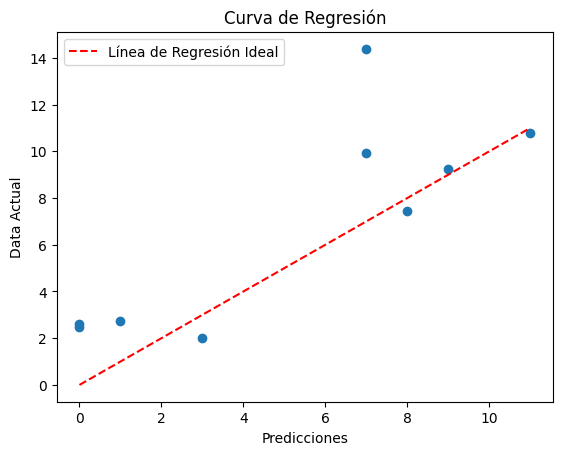

Predicción de ventas para el siguiente mes 1: 23.796666666666667
Predicción de ventas para el siguiente mes 2: 18.843333333333334
Predicción de ventas para el siguiente mes 3: 10.453333333333333
Predicción de ventas para el siguiente mes 4: 20.716666666666665
Predicción de ventas para el siguiente mes 5: 20.62
Predicción de ventas para el siguiente mes 6: 18.893333333333334
Predicción de ventas para el siguiente mes 7: 16.916666666666668
Predicción de ventas para el siguiente mes 8: 24.513333333333332
Predicción de ventas para el siguiente mes 9: 23.21
Predicción de ventas para el siguiente mes 10: 25.19


In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("Melsol-test.xlsx")

x = df.drop(["PRODUCTOS VENDIDOS"], axis=1)
y = df["PRODUCTOS VENDIDOS"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
model = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10)
regressor = model.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

r2 = r2_score(y_test, y_pred)

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R²: {r2}")

# Gráfico de Dispersión (Scatter Plot)
plt.figure(figsize = (10, 5))
plt.scatter (y_test, y_pred, color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Gráfico de Dispersión')
plt.xlabel('Predicciones')
plt.ylabel('Data Actual')
plt.show()

# Curva de regresión
x_range = np.linspace(min(y_test), max(y_test), 100)
y_range = x_range  # Línea de regresión ideal (y = x)

plt.scatter(y_test, y_pred)
plt.plot(x_range, y_range, color="red", linestyle="--", label="Línea de Regresión Ideal")
plt.xlabel("Predicciones")
plt.ylabel("Data Actual")
plt.title("Curva de Regresión")
plt.legend()
plt.show()

ventas_reales = pd.read_excel("Diclofenaco-prediccion.xlsx")

predicciones_nuevas = model.predict(ventas_reales)

print(f"Predicción de ventas para el siguiente mes 1: {predicciones_nuevas[0]}")
print(f"Predicción de ventas para el siguiente mes 2: {predicciones_nuevas[1]}")
print(f"Predicción de ventas para el siguiente mes 3: {predicciones_nuevas[2]}")
print(f"Predicción de ventas para el siguiente mes 4: {predicciones_nuevas[3]}")
print(f"Predicción de ventas para el siguiente mes 5: {predicciones_nuevas[4]}")
print(f"Predicción de ventas para el siguiente mes 6: {predicciones_nuevas[5]}")
print(f"Predicción de ventas para el siguiente mes 7: {predicciones_nuevas[6]}")
print(f"Predicción de ventas para el siguiente mes 8: {predicciones_nuevas[7]}")
print(f"Predicción de ventas para el siguiente mes 9: {predicciones_nuevas[8]}")
print(f"Predicción de ventas para el siguiente mes 10: {predicciones_nuevas[9]}")

In [3]:
import pandas as pd
df = pd.read_excel("../Data/Data Set - Prueba-Test.xlsx", engine="openpyxl")

In [4]:
df.shape

(10, 7)